


Logistic Regression Project - Solutions

In this project the work is done with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. This model trys to predict whether or not they will click on an ad based off the features of that user.

This data set contains the features:

- 'Daily Time Spent on Site': consumer time on site in minutes
- 'Age': cutomer age in years
- 'Area Income': Avg. Income of geographical area of consumer
- 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
- 'Ad Topic Line': Headline of the advertisement
- 'City': City of consumer
- 'Male': Whether or not consumer was male
- 'Country': Country of consumer
- 'Timestamp': Time at which consumer clicked on Ad or closed window
- 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
%matplotlib inline

In [28]:
print('importing database and calling it as ad_df.')
ad_df = pd.read_csv('advertising.csv')

importing database and calling it as ad_df.


In [29]:
print('Unsderstanding the raw inputed data.')
print(10*"__-__-__-__")
print(ad_df.head(5))
#Here its is possible to see the Columns and 5 rows of the data
print(10*"__-__-__-__")
#The databas has data columns as float, integer and objec format distributed in 1000 rowsand 10 columns, summing up to 78.2 KB
print(ad_df.info())
print(10*"__-__-__-__")
print(ad_df.describe())
#The basic statistic are shown in a matter of better understanding the data distribution.
print(10*"__-__-__-__")

Unsderstanding the raw inputed data.
__-__-__-____-__-__-____-__-__-____-__-__-____-__-__-____-__-__-____-__-__-____-__-__-____-__-__-____-__-__-__
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utiliz

Although the statici informaiton helps to understanding the data, visualizing the data can offer greater insights.
A correlation Heatmap is a great form to look into variables correlation between themselves and between the target variabel.
In a quick look at the CLiecked on Ad column it is possible to see that Age has a great correlation value and Daily Time Spent on Site and Daily Internet Usage have a negative correlation 


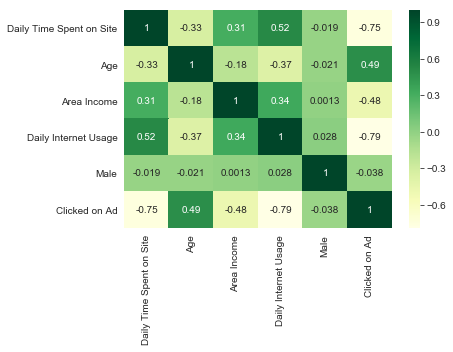

In [58]:
print("Although the statici informaiton helps to understanding the data, visualizing the data can offer greater insights.")
adcorr = ad_df.corr()
print('A correlation Heatmap is a great form to look into variables correlation between themselves and between the target variabel.')
print('In a quick look at the CLiecked on Ad column it is possible to see that Age has a great correlation value and Daily Time Spent on Site and Daily Internet Usage have a negative correlation ')
sns.heatmap(adcorr, annot= True, cmap = "YlGn")

The age is a importantefactor in the required study, plotting the age distribution shall offer a better comprehension.
The Age feature is well distributed but with certain picks.


Text(0.5, 0, 'Age')

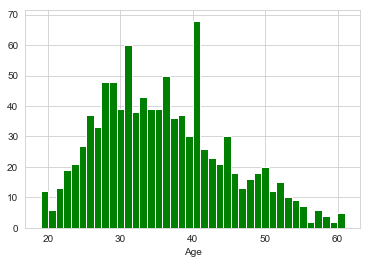

In [32]:
print('The age is an important feature, plotting the age distribution shall offer a better comprehension.')
print('The Age feature is well distributed but with certain picks.')
sns.set_style('whitegrid')
ad_df['Age'].hist(bins=40, color='green')
plt.xlabel('Age')

A interesting correlation is Age Vs Area Income; it is interesting to see how related are these 2.


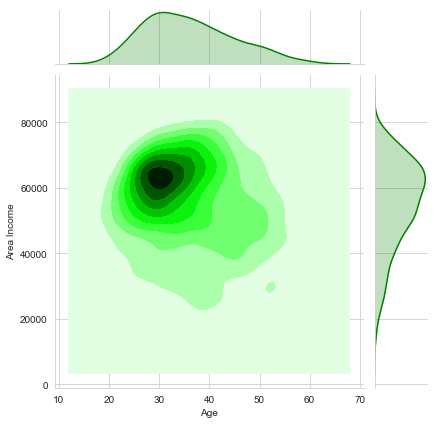

In [62]:
print('A interesting correlation is Age Vs Area Income; it is interesting to see how related are these 2.')
sns.jointplot(x='Age',y='Area Income',data=ad_df, color = 'green',kind='kde')

In order to keeping the study of the Age feature, the correlation with Daly Time Spent on Site shall be seen.
As in before it is easily seen that there is a concentraion of the distributed data but in this case there is another group, near the 41 years old and around the 40 minutres on Dailçy Time Spent on Site.


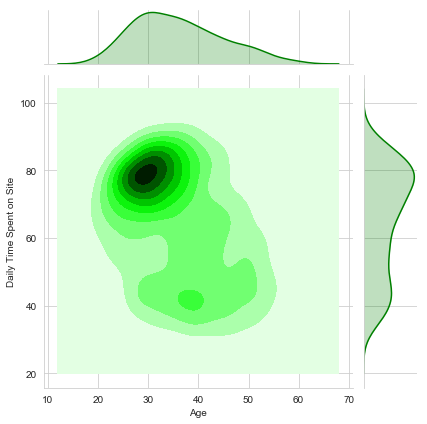

In [64]:
print('In order to keeping the study of the Age feature, the correlation with Daly Time Spent on Site shall be seen.')
print('As in before it is easily seen that there is a concentraion of the distributed data but in this case there is another group, near the 41 years old and around the 40 minutres on Dailçy Time Spent on Site.')
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_df,color='green',kind='kde')

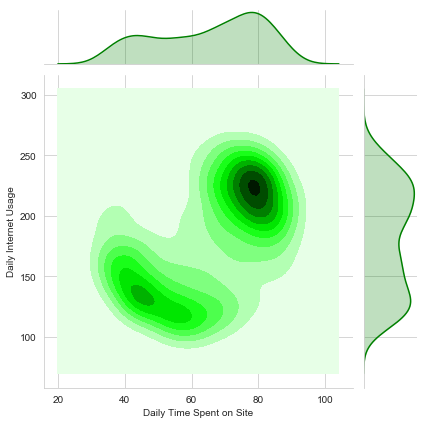

In [66]:
print('The correlation graph between Daily Time Spent on Site and Daily Internet Usage.')
print('As in the last graphe there are two concentrations along the data with different behaviors,')
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_df,color='green',kind='kde')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


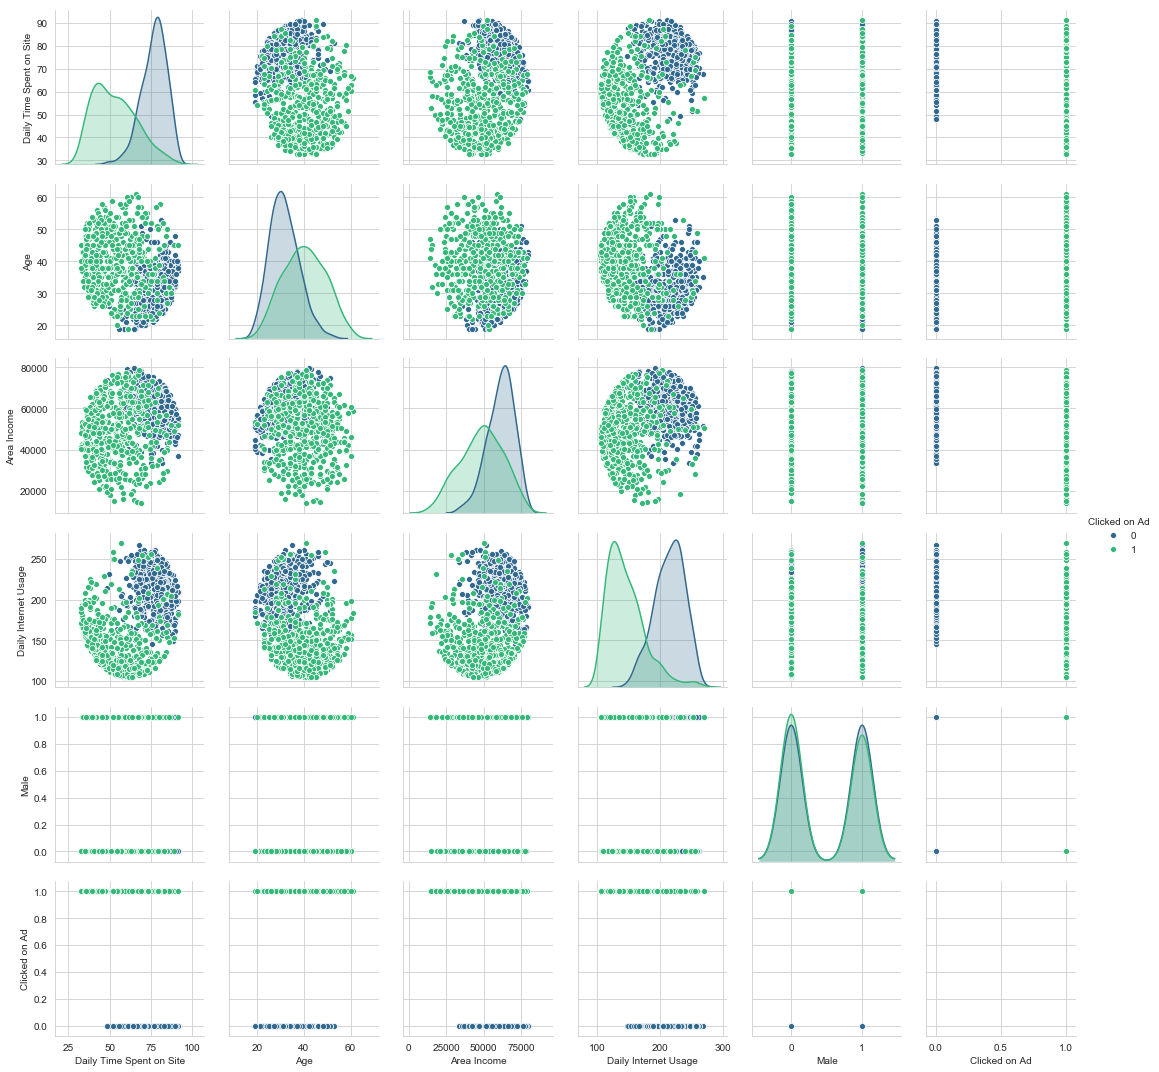

In [68]:
print('Thepairplot function whith the target columnd detached can give a easy a insight in this matrix of graphs:')
sns.pairplot(ad_df,hue='Clicked on Ad',palette='viridis')
print('Some of these graphs can give a detached information between the two groupos that Clicked on Ad nad the one who didnt.')

In [78]:
from sklearn.model_selection import train_test_split 

In [79]:
print('The features are separed between the ones who shall be used for training (X) on for validating (y)')
print(f"X:{X}")
print(f"X:{y}")
X = ad_df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']] #
y = ad_df['Clicked on Ad']

The features are separed between the ones who shall be used for training (X) on for validating (y)
X:     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
0                       68.95   35     61833.90                256.09     0
1                       80.23   31     68441.85                193.77     1
2                       69.47   26     59785.94                236.50     0
3                       74.15   29     54806.18                245.89     1
4                       68.37   35     73889.99                225.58     0
5                       59.99   23     59761.56                226.74     1
6                       88.91   33     53852.85                208.36     0
7                       66.00   48     24593.33                131.76     1
8                       74.53   30     68862.00                221.51     1
9                       69.88   20     55642.32                183.82     1
10                      47.64   49     45632.51                

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('The amount of data used as for training was take as 0.33  of the total data. A random state was defined in order be make it possible to rerun the test and compare the results. The random state number was taken as 42')

The amount of data used as for training was take as 0.33  of the total data. A random state was defined in order be make it possible to rerun the test and compare the results. The random state number was taken as 42


In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
print('With the model trained it is possible to realize the predictions:')
predictions = logmodel.predict(X_test)

With the model trained it is possible to realize the predictions:


** Create a classification report for the model.**

In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test,predictions))
print('The classification_report showed a precision of 91% waht is great!')

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       162
           1       0.96      0.86      0.91       168

   micro avg       0.91      0.91      0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

